<a href="https://colab.research.google.com/github/ahwebb/Clustering/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

## Move centers closer together

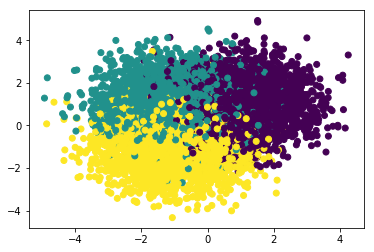

In [2]:
centers = [[1, 1], [-1, 1], [-1, -1]]

X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### K-Means

In [0]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

In [0]:
X_pca = PCA(2).fit_transform(X)

In [0]:
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

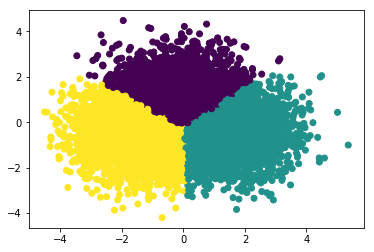

In [6]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

In [7]:
print(pd.crosstab(y, y_pred))

col_0     0     1     2
row_0                  
0       390  2759   185
1      2282   546   505
2       391   197  2745


In [8]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=200)
minibatchkmeans.fit(X_pca)

predict_mini = minibatchkmeans.predict(X_pca)

print(pd.crosstab(y, predict_mini))

col_0     0     1     2
row_0                  
0      2743   229   362
1       572   440  2321
2       160  2675   498


### Mean Shift

In [0]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [10]:
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters = len(np.unique(labels))

print(n_clusters)

1


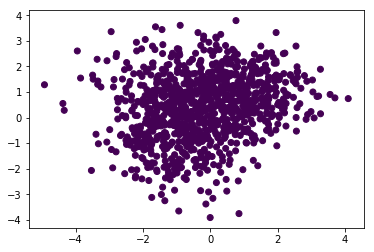

In [11]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

In [12]:
print(pd.crosstab(y_train, labels))

col_0    0
row_0     
0      362
1      320
2      318


### Spectral Clustering

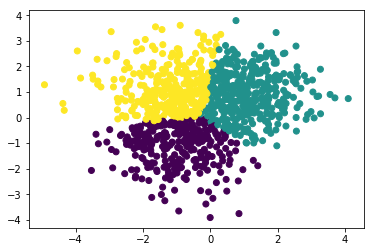

In [13]:
from sklearn.cluster import SpectralClustering

n_clusters=3

sc = SpectralClustering(n_clusters=3)
sc.fit(X_train)

predict = sc.fit_predict(X_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

In [14]:
print(pd.crosstab(y_train, predict))

col_0    0    1    2
row_0               
0       13  303   46
1       41   57  222
2      239   34   45


### Affinity Clustering

In [0]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation().fit(X_train)

cluster_centers_indices = af.cluster_centers_indices_
n_clusters = len(cluster_centers_indices)
labels = af.labels_

In [16]:
n_clusters

88

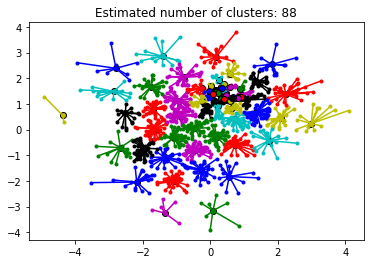

In [17]:
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters))
plt.show()